# Assignment 4


In [303]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import random
from scipy.stats import ks_2samp
from scipy.stats import pearsonr
from scipy.stats import spearmanr

%matplotlib inline

import os

np.random.seed(2000)


# Read in data


In [263]:
datestring1 = '201606'
getCitiBikeCSV(datestring1)

('Downloading', '201606')
file in place, you can continue


In [264]:
datestring2 = '201612'
getCitiBikeCSV(datestring2)

('Downloading', '201612')
file in place, you can continue


## Downloaded the data for June and December 2016

In [306]:
df1 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring1 + '-citibike-tripdata.csv')
df2 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring2 + '-citibike-tripdata.csv')
#df1.head()

In [307]:
df1.rename(columns={'tripduration': 'Trip Duration', 'starttime': 'Start Time', 'stoptime': 'Stop Time', 'start station id': 'Start Station ID', 'start station name': 'Start Station Name', 'start station latitude': 'Start Station Latitude', 'start station longitude': 'Start Station Longitude', 'end station id': 'End Station ID', 'end station name': 'End Station Name', 'end station latitude': 'End Station Latitude', 'end station longitude': 'End Station Longitude', 'bikeid': 'Bike ID', 'usertype': 'User Type', 'birth year': 'Birth Year', 'gender': 'Gender'}, inplace=True)
df1.head()

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender
0,1470,6/1/2016 00:00:18,6/1/2016 00:24:48,380,W 4 St & 7 Ave S,40.734011,-74.002939,3236,W 42 St & Dyer Ave,40.758985,-73.993800,19859,Subscriber,1972.0,1
1,229,6/1/2016 00:00:20,6/1/2016 00:04:09,3092,Berry St & N 8 St,40.719009,-73.958525,3103,N 11 St & Wythe Ave,40.721533,-73.957824,16233,Subscriber,1967.0,1
2,344,6/1/2016 00:00:21,6/1/2016 00:06:06,449,W 52 St & 9 Ave,40.764618,-73.987895,469,Broadway & W 53 St,40.763441,-73.982681,22397,Subscriber,1989.0,1
3,1120,6/1/2016 00:00:28,6/1/2016 00:19:09,522,E 51 St & Lexington Ave,40.757148,-73.972078,401,Allen St & Rivington St,40.720196,-73.989978,16231,Subscriber,1991.0,1
4,229,6/1/2016 00:00:53,6/1/2016 00:04:42,335,Washington Pl & Broadway,40.729039,-73.994046,285,Broadway & E 14 St,40.734546,-73.990741,15400,Subscriber,1989.0,1


In [267]:
df2.head()

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender
0,528,2016-12-01 00:00:04,2016-12-01 00:08:52,499,Broadway & W 60 St,40.769155,-73.981918,228,E 48 St & 3 Ave,40.754601,-73.971879,26931,Subscriber,1964.0,1
1,218,2016-12-01 00:00:28,2016-12-01 00:04:06,3418,Plaza St West & Flatbush Ave,40.675021,-73.971115,3358,Garfield Pl & 8 Ave,40.671198,-73.974841,27122,Subscriber,1955.0,1
2,399,2016-12-01 00:00:39,2016-12-01 00:07:19,297,E 15 St & 3 Ave,40.734232,-73.986923,345,W 13 St & 6 Ave,40.736494,-73.997044,19352,Subscriber,1985.0,1
3,254,2016-12-01 00:00:44,2016-12-01 00:04:59,405,Washington St & Gansevoort St,40.739323,-74.008119,358,Christopher St & Greenwich St,40.732916,-74.007114,20015,Subscriber,1982.0,1
4,1805,2016-12-01 00:00:54,2016-12-01 00:31:00,279,Peck Slip & Front St,40.707873,-74.001670,279,Peck Slip & Front St,40.707873,-74.001670,23148,Subscriber,1989.0,1


## Combining the two months data

In [308]:
total = [df1, df2]
data = pd.concat(total)
len(data)

2272510

In [309]:
data.head()

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender
0,1470,6/1/2016 00:00:18,6/1/2016 00:24:48,380,W 4 St & 7 Ave S,40.734011,-74.002939,3236,W 42 St & Dyer Ave,40.758985,-73.993800,19859,Subscriber,1972.0,1
1,229,6/1/2016 00:00:20,6/1/2016 00:04:09,3092,Berry St & N 8 St,40.719009,-73.958525,3103,N 11 St & Wythe Ave,40.721533,-73.957824,16233,Subscriber,1967.0,1
2,344,6/1/2016 00:00:21,6/1/2016 00:06:06,449,W 52 St & 9 Ave,40.764618,-73.987895,469,Broadway & W 53 St,40.763441,-73.982681,22397,Subscriber,1989.0,1
3,1120,6/1/2016 00:00:28,6/1/2016 00:19:09,522,E 51 St & Lexington Ave,40.757148,-73.972078,401,Allen St & Rivington St,40.720196,-73.989978,16231,Subscriber,1991.0,1
4,229,6/1/2016 00:00:53,6/1/2016 00:04:42,335,Washington Pl & Broadway,40.729039,-73.994046,285,Broadway & E 14 St,40.734546,-73.990741,15400,Subscriber,1989.0,1


## Dropping the rows with zero values

In [310]:
data = data.dropna()
len(data)

2032212

## Keeping only the time part in the datetime column

In [311]:
data['date'] = data['Start Time']
data['date'] = pd.to_timedelta(data['date'].str.split().str[1])

In [312]:
data.head()

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender,date
0,1470,6/1/2016 00:00:18,6/1/2016 00:24:48,380,W 4 St & 7 Ave S,40.734011,-74.002939,3236,W 42 St & Dyer Ave,40.758985,-73.993800,19859,Subscriber,1972.0,1,00:00:18
1,229,6/1/2016 00:00:20,6/1/2016 00:04:09,3092,Berry St & N 8 St,40.719009,-73.958525,3103,N 11 St & Wythe Ave,40.721533,-73.957824,16233,Subscriber,1967.0,1,00:00:20
2,344,6/1/2016 00:00:21,6/1/2016 00:06:06,449,W 52 St & 9 Ave,40.764618,-73.987895,469,Broadway & W 53 St,40.763441,-73.982681,22397,Subscriber,1989.0,1,00:00:21
3,1120,6/1/2016 00:00:28,6/1/2016 00:19:09,522,E 51 St & Lexington Ave,40.757148,-73.972078,401,Allen St & Rivington St,40.720196,-73.989978,16231,Subscriber,1991.0,1,00:00:28
4,229,6/1/2016 00:00:53,6/1/2016 00:04:42,335,Washington Pl & Broadway,40.729039,-73.994046,285,Broadway & E 14 St,40.734546,-73.990741,15400,Subscriber,1989.0,1,00:00:53


In [313]:
data.rename(columns={'date': 'Time'}, inplace=True)

## Testing the distribution of ridership in day and night

In [314]:
data1 = data[['Trip Duration', 'Time']]
data1.head()

,Trip Duration,Time
0,1470,00:00:18
1,229,00:00:20
2,344,00:00:21
3,1120,00:00:28
4,229,00:00:53


### Defining night to be between 2100 and 0500 and rest of the time as day

In [315]:
Night = pd.to_timedelta(['21:00:00', '05:00:00'])

In [316]:
dataNight1 = data1[data1.Time>Night[0]]
dataNight2 = data1[data1.Time<Night[1]]
DayData1 = data1[data1.Time<Night[0]]
DayData2 = data1[data1.Time>Night[1]]

In [317]:
DayData = DayData2[DayData2.Time<Night[0]]
DayData.tail()

,Trip Duration,Time
811044,258,20:59:18
811045,629,20:59:22
811046,141,20:59:38
811047,317,20:59:47
811048,595,20:59:53


In [318]:
nightd = [dataNight1, dataNight2]
NightData = pd.concat(nightd)

### Arrays of the trip duration of day and night

In [319]:
arr1 = np.array(NightData['Trip Duration'])
arr2 = np.array(DayData['Trip Duration'])

In [320]:
print len(arr1), len(arr2)

185146 1847041


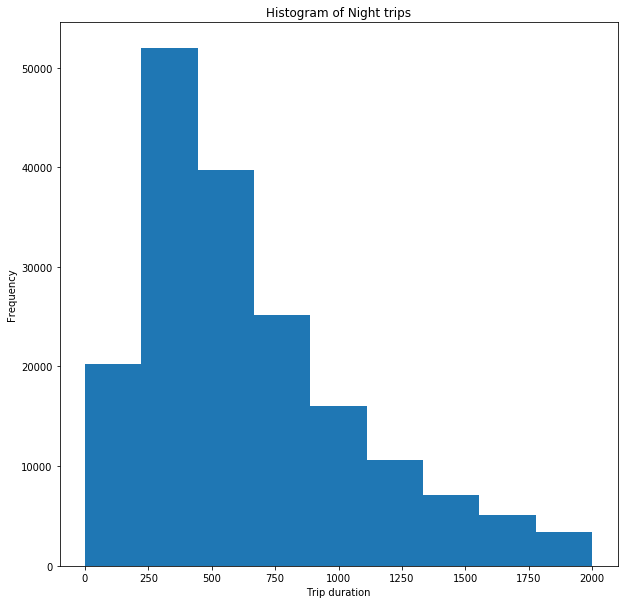

In [323]:
plt.figure(figsize=(10,10))
plt.hist(arr1, bins = np.linspace(0,2000,10))
plt.title('Histogram of Night trips')
plt.ylabel('Frequency')
plt.xlabel('Trip duration')

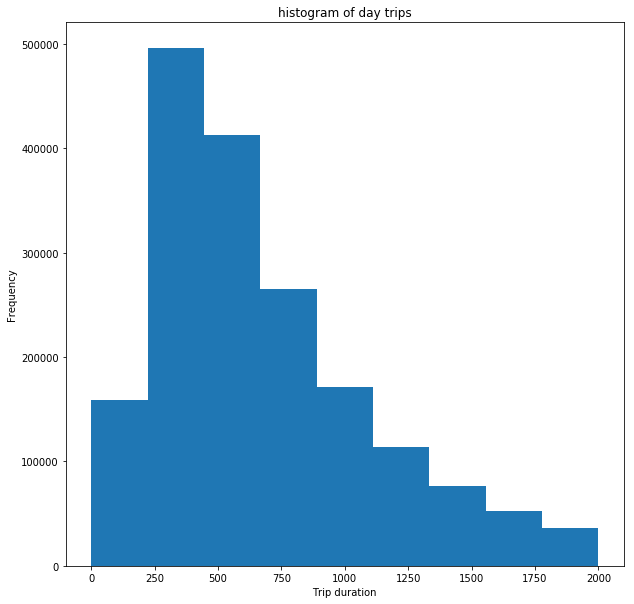

In [324]:
plt.figure(figsize=(10,10))
plt.hist(arr2, bins = np.linspace(0,2000,10))
plt.title('histogram of day trips')
plt.ylabel('Frequency')
plt.xlabel('Trip duration')

## Running the K-S test on the original sample

## Null Hypothesis for the day vs night trip distribution

## H0: The trip duration distribution for the daytime is statistically same as that for the night time. (significance = 0.05)

In [325]:
ks = ks_2samp(arr1, arr2)
print ks

Ks_2sampResult(statistic=0.036390534563036495, pvalue=4.2294494809359876e-194)


The k-s statistic is 0.036 and p-value is very low which suggests that we can reject the null hypothesis

## Running the K-S test on the sample 200 times smaller

In [328]:
x = 0.005
x1 = x*len(arr1)
x2 = x*len(arr2)
print x1, x2


925.73 9235.205


We need to keep just 925 elements of the first array and 9235 elements from the second array

In [327]:
arr1_red = random.sample(arr1, 925)
arr2_red = random.sample(arr2, 9325)

In [329]:
ks1 = ks_2samp(arr1_red, arr2_red)
print ks1

Ks_2sampResult(statistic=0.04044924280849402, pvalue=0.12438777794245852)


### The p value has risen significantly and we cannot reject the null hypothesis. This makes sense as the bigger samples have larger datapoints which makes it hard for the test to tell that the samples are similar even if they may be same.

## Running the Pearson test on the original sample

## Null Hypothesis for the day vs night trip distribution

## H0: The trip duration distribution distribution for the daytime is statistically same as for the night time.

Test require both the sample sizes to be of the same value. So we create a random sample from the bigger sample and make it equal to the length of first array

In [290]:
arr3 = random.sample(arr2, 185146)

In [330]:
pear = pearsonr(arr1, arr3)
print pear

(0.00038373198901683946, 0.86885474551411179)


### The coefficient of 0.00038 indicates that there is very little correlation between the two sample values. But the p value of 0.86 tell us that there is a high probability of the samples being statistically the same. So we cannot reject the null hypothesis 

## Running Spearman test on the two original samples

## Null Hypothesis for the day vs night trip distribution

## H0: The trip duration distribution distribution for the daytime is statistically same as for the night time.

Test require both the sample sizes to be of the same value. So we create a random sample from the bigger sample and make it equal to the length of first array

In [331]:
spear = spearmanr(arr1, arr3)
print spear

SpearmanrResult(correlation=-0.0063057923122689478, pvalue=0.006661626487253971)


### The coefficient of 0.0063 indicates that there is very little correlation between the two sample values. And the low p value of 0.0066 tell us that there is a low chance of the samples being statistically the same. So we can reject the null hypothesis 